# Basic algorithms for image analysis - Practice - Assignment 3

This notebook is presented as an Assignment for the course "Sensor Data Analytics" at Eötvos Lorand University (ELTE).

The goal for this assignment is to program the Otsu's Thresholding algorithm.

The output must be composed by the tresholded image and the obtained threshold value.

It is not allowed the use of python-libraries for performing the calculations.

## 1.- Import libraries

In [2]:
import cv2
import urllib
import numpy as np
from matplotlib import pyplot as plt

## 2.- Read images

**Note:** We read the images online, internet connection needed

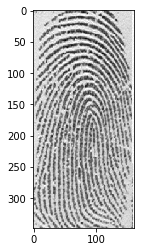

In [9]:
# Black & White image
req = urllib.request.urlopen('http://athos.vision.sztaki.hu/~mitya/education/sdapr/test-images/PNG/finger.png')
arr = np.asarray(bytearray(req.read()))
img = cv2.imdecode(arr, -1) # 'Load it as it is'
req.close()
# img = cv2.imread("julia.png", 0)
# Display
plt.imshow(img, cmap='gray')
plt.show()

## 3.- Functions needed

4. **Otsu**, Performs Otsu´s method
        Input --> Image
        Output --> prints the threshold, the histogram, the original image and the result image of the method

In [20]:
def Otsu(image):
    # 1.- Calculation of histogram, the sum of elements, mu, the initial
    #     value for the loop
    a = plt.hist(image.ravel(),256,[0,256]) 
    total = np.sum(a[0])
    m = sum(a[1][1:256]*(a[0][1:256]/total))
    
    init = (a[0]!=0).argmax(axis=0)
    
    # 2.- Initialization
    
    q = np.zeros(255-init+1)
    mu1 = np.zeros(255-init+1)
    mu2 = np.zeros(255-init+1)
    
    # 3.- Recursive formula
    for i in range(init,255):
        q[i-init+1] = q[i-init] + a[0][i]/total
        mu1[i-init+1] = (q[i-init]*mu1[i-init]+((i+1)*a[0][i+1])/total)/q[i-init+1]
        mu2[i-init+1] = (m-q[i-init+1]*mu1[i-init+1])/(1-q[i-init+1])
    
    # 4.- Sigma and t calculation
    q2 = 1 - q
    sigma = q*q2*(mu1-mu2)**2
    
    t = np.where(sigma == np.max(sigma))[0][1]
    print(t)
    # 5.- Output image 
    new_image = np.zeros(img.shape)
    for i in range(0,img.shape[0]):
        for j in range(0, img.shape[1]):
            if img[i][j]<t:
                new_image[i][j] = 0
            else:
                new_image[i][j] = 255
    
    # 6.- Display
    print("Threshold: ", t)
    
    plt.figure("title", figsize=(20,20))
    plt.subplot(121)
    plt.title("Original Image")
    plt.xticks([]), plt.yticks([])
    plt.imshow(img,cmap='gray')

    plt.subplot(122)
    plt.title("After filter")
    plt.xticks([]), plt.yticks([])
    plt.imshow(new_image,cmap='gray')

    plt.show()

## 4.- Execution

155
Threshold:  155


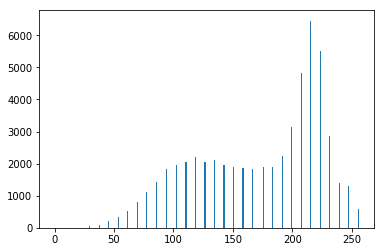

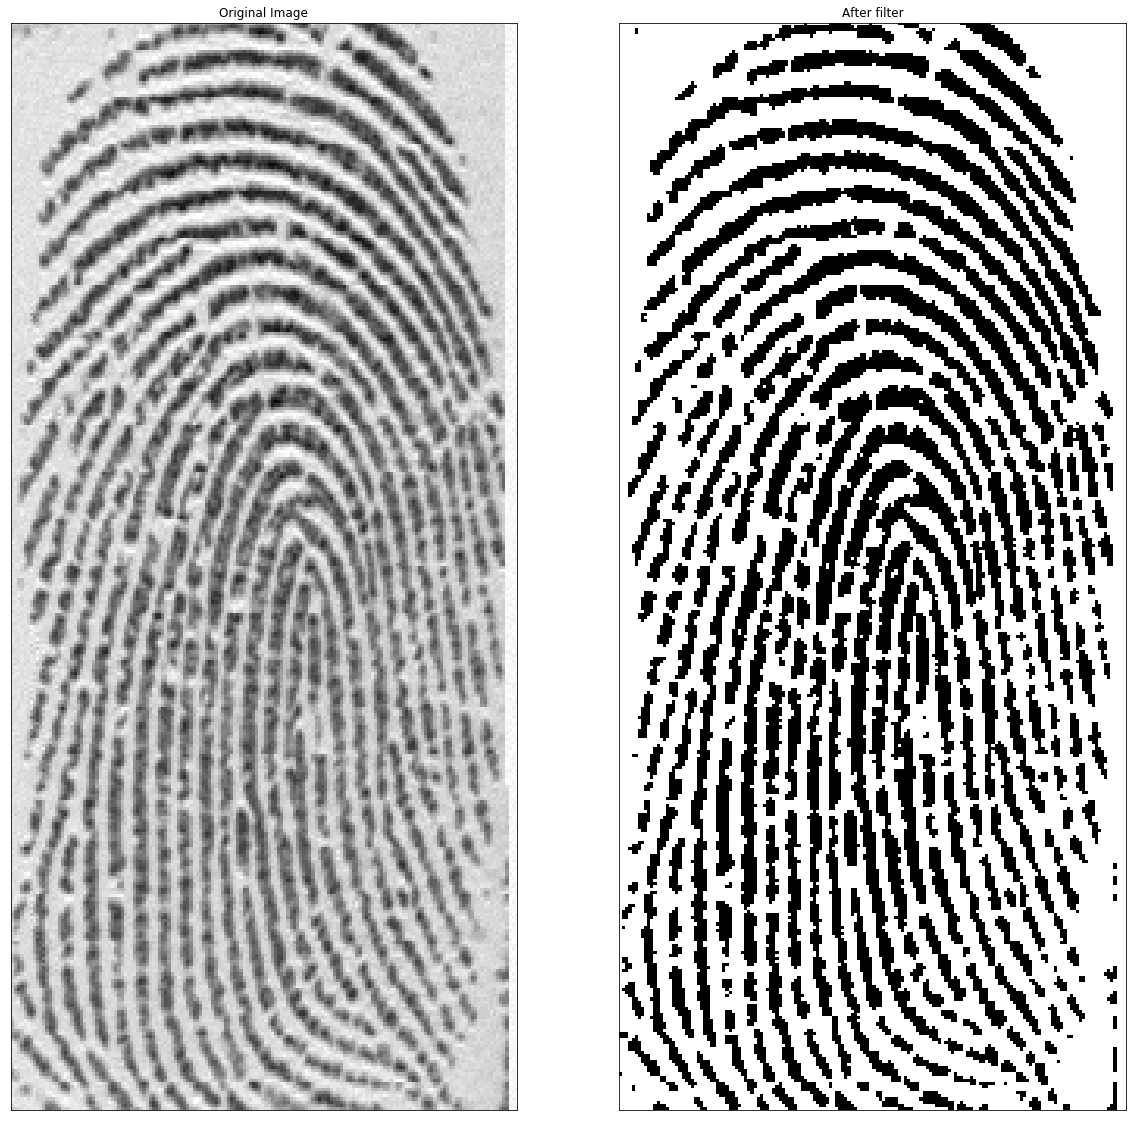

In [21]:
Otsu(img)

## 5.- Conclusion

We can appreciate how the image of the fingerprint is improved with more contrast by applying this method